# TP - Sélectionnez le nombre de voisins dans un kNN

## 1. Introduction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## sklearn module : 
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
data_path = "~/Documents/openclassroom/Fomation_ingenieur_ML/data/"

In [2]:
df = pd.read_csv(data_path+'winequality-red+.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


There are 11 numerical descriptive variables and 1 ranking feature. Let us first see the descriptive stats for these data :  
%##TODO : see further with the descriptive stat course (in ML programme) 

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Then, in the course, they propose to transform the data into numpy type -> why ? 
I have so written the plot with the pandas structure

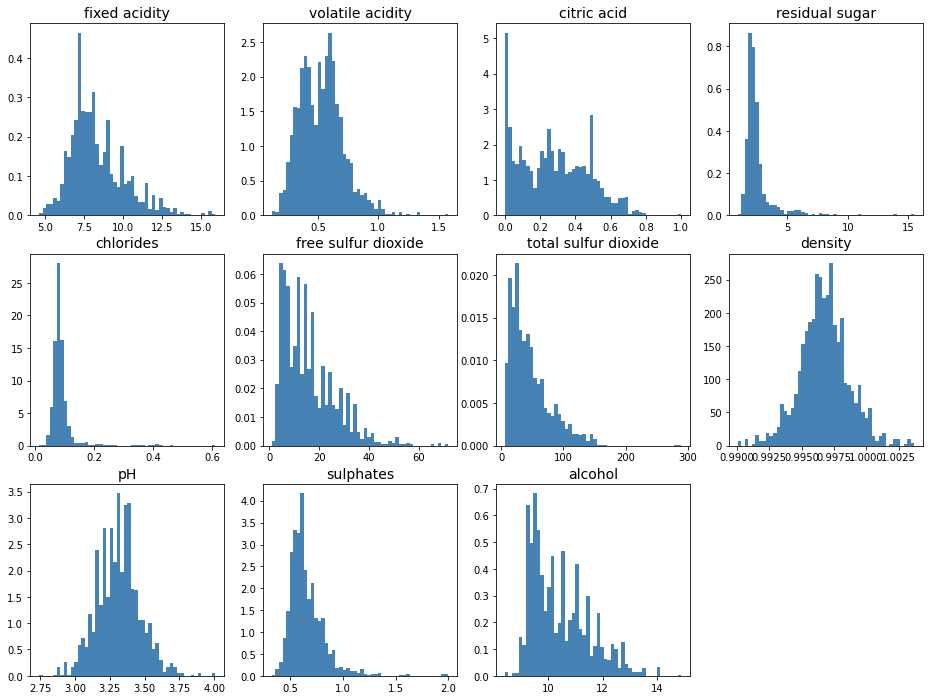

In [4]:
fig = plt.figure(figsize=(16, 12))
fig_count = 1
for var_name in df.columns.values[:-1] : 
    ax = fig.add_subplot(3,4, fig_count)
    ax.hist(df[var_name], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(var_name, fontsize=14)
    fig_count += 1

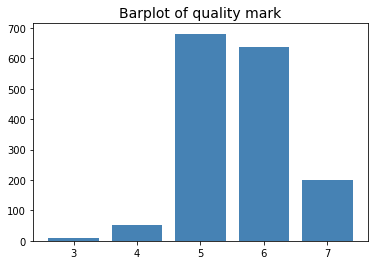

In [5]:
## BARPLOT FOR QUALITY FEATURE : 
absc = range(df.quality.min(), df.quality.max())
plt.bar(absc, [(df.quality == a).sum() for a in absc],color='steelblue')
plt.title("Barplot of quality mark", fontsize=14)
plt.show()

##### Binary classification : 
Now, we aim to transform this problem into a binary classification, that is we just want to predict if the wine is good or bad. to do so, we introduce an arbitrary threshol. Note that in a real life problem, I would have consider it as an hyperparameter - that is it would have to be fitted. But as our goal on this TP is to practise, I have decided to set it as the mean of the quality mark. That means that a wise is said to be "good" (class = 1) if its quality mark is better than the mean quality. 

So we need to set : 
* $X$ the matrix containing the differents features that characterize the wine
* $y$ = binary vector, equals to 1 if the wine is "good", 0 otherwise

In [6]:
X = df.drop("quality", axis = 1, inplace = False)
threshold = np.floor(df.quality.mean())
y = np.where(df.quality < threshold, 0,1) 
# np.where(condition, x, y)
# x = value if True  // y = value if False

train_size=0.7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=train_size)

#### Normalization : 
As we are to use KNN models, it is necessary to standardize our data (that is centered and with Var = 1). The good pratice is to fit the standardization on train set, and fit it to both the train and the test set (the test set is "normaly" with the same distribution than the training set)

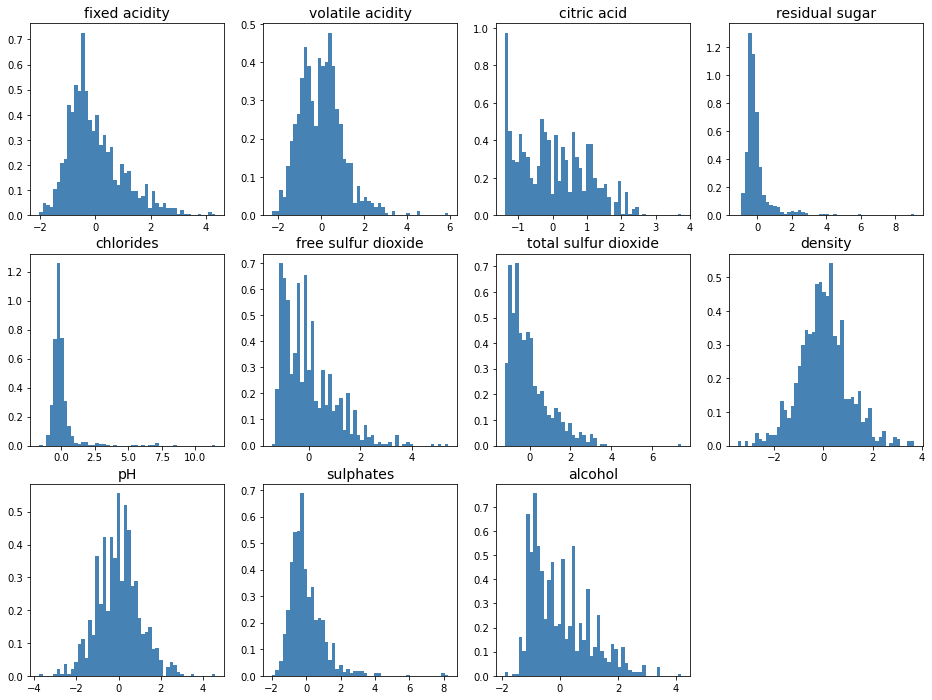

In [7]:
## FIT SCALER : 
my_normalizer = preprocessing.StandardScaler().fit(X_train)

## TRANSFORM DATA : caution, pandas DataFrame 
X_train_std = pd.DataFrame(my_normalizer.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_std = pd.DataFrame(my_normalizer.transform(X_test), index = X_test.index, columns = X_test.columns)

## GRAPHICAL CHECK FOR STANDARDIZATION : 
fig = plt.figure(figsize=(16, 12))
fig_count = 1
for var_name in X_train_std.columns.values : 
    ax = fig.add_subplot(3,4, fig_count)
    ax.hist(X_train_std[var_name], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(var_name, fontsize=14)
    fig_count += 1

In [8]:
X_train_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1420,-0.272524,0.014255,-1.338925,-0.653798,-0.223978,-1.230043,-0.816646,-0.885386,-1.000138,-1.191454,-0.591604
668,0.982667,1.143542,0.817506,-0.161895,-0.619851,-0.075733,-0.450334,-0.044808,-1.065867,-0.516491,0.531099
1161,0.298017,-0.437460,0.817506,-0.794342,-0.245971,-0.364311,-0.755594,-0.617452,-0.671497,0.587995,-0.217370
620,0.012747,0.070719,-0.158023,0.611095,-0.245971,0.020459,2.022274,0.480553,-0.277128,-0.271049,-0.965838
320,0.868559,0.748291,0.612131,0.470552,-0.092021,0.501421,0.404395,1.163522,0.380155,0.342554,0.998892
...,...,...,...,...,...,...,...,...,...,...,...
86,0.183909,-0.211602,0.047352,-0.442983,0.501789,0.405229,2.754899,0.270408,-2.511888,7.951234,-0.498045
188,-0.215470,-0.155138,0.304070,-0.372711,-0.070028,-0.075733,2.968581,0.060264,-0.737225,-0.639211,-0.872280
1262,0.868559,-0.437460,0.560788,-0.021352,-0.136006,1.751924,0.618077,0.301930,-1.065867,-0.455130,-0.591604
1396,0.240963,0.832988,-0.876833,-0.653798,0.061930,-1.133850,-1.060855,0.401749,-0.014215,-0.025608,-0.825500


## 2. KNN 

### 2.1 Classifier without CV (k=3) : 

Ok, now, I have all that I need to launch a knn. Let us first recall the syntax to call KNN, with a given k (it is in 1_Introduction_au_ML/TPcours2, note that here k=3)

In [9]:
k=3
knn_clf = neighbors.KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train_std,y_train)
#knn_clf.predict(X_test_std)

KNeighborsClassifier(n_neighbors=3)

### 2.2 CV (fitting the better k) :  

In [10]:
param_grid = {"n_neighbors" : np.arange(2,15,1)}
# the "n_neighbors" param in clf will take value in ... 

nb_folds = 5
my_clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, 
                                      cv = nb_folds, scoring = "accuracy")
my_clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy')

##### Principal methods of this classifier : 

In [11]:
# GET THE BETTER k : 
k = my_clf.best_params_.values()
print(my_clf.best_params_,"\n")

#my_clf.cv_results_ is a dict containub--ing the main results : 
res_dict = my_clf.cv_results_
print(res_dict.keys(), "\n")

## new syntax to iterate <3 <3 : 
iterator = zip(res_dict["mean_test_score"], res_dict["std_test_score"], res_dict["params"])
for mean, std, params in iterator:
    print("accuracy = %0.3f (+/-%0.3f) for %s" %(mean, 2*std, params))

{'n_neighbors': 11} 

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']) 

accuracy = 0.935 (+/-0.042) for {'n_neighbors': 2}
accuracy = 0.960 (+/-0.013) for {'n_neighbors': 3}
accuracy = 0.955 (+/-0.010) for {'n_neighbors': 4}
accuracy = 0.960 (+/-0.008) for {'n_neighbors': 5}
accuracy = 0.958 (+/-0.009) for {'n_neighbors': 6}
accuracy = 0.961 (+/-0.007) for {'n_neighbors': 7}
accuracy = 0.961 (+/-0.007) for {'n_neighbors': 8}
accuracy = 0.961 (+/-0.007) for {'n_neighbors': 9}
accuracy = 0.961 (+/-0.007) for {'n_neighbors': 10}
accuracy = 0.962 (+/-0.004) for {'n_neighbors': 11}
accuracy = 0.962 (+/-0.004) for {'n_neighbors': 12}
accuracy = 0.962 (+/-0.004) for {'n_neighbors': 13}
accuracy = 0.962 (+/-0.004) for {'n_neighbors': 14}


##### Graphics : Accuracy = f ( n_neighbors ) 

In [12]:
## What type of graph can we imagine ?? 

##### Accuracy on the test sample : 

In [13]:
prediction_test = my_clf.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,prediction_test))

0.95625


## 3. To go further : If we had 2 hyperparemeters : 

The GridSearchCV can only loop on parameter of the classifier function. That means that one can loop in our example on both the "n_neighbors" and the "metrics" parameters of the classifier "sklearn.neighbors.KNeighborsClassifier".

**-> solution in the next TP =)**

In [23]:
## CLASSIFICATION DESIGN :
X = df.drop("quality", axis = 1, inplace = False)
#### here !!!!
threshold = np.floor(df.quality.mean())
y = np.where(df.quality < threshold, 0,1) 

## SAMPLING :
train_size=0.7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=train_size)

## STANDARDIZATION : 
my_normalizer = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(my_normalizer.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_std = pd.DataFrame(my_normalizer.transform(X_test), index = X_test.index, columns = X_test.columns)

## CROSS VALIDATION :
# param_grid = {"n_neighbors" : np.arange(8,14,1), "metric" : ["euclidean","manhattan", "chebyshev"]}
param_grid = {"n_neighbors" : [10,15], "metric" : ["euclidean","manhattan"]}

nb_folds = 5
my_clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, 
                                      cv=nb_folds, scoring = "accuracy")
my_clf.fit(X_train_std, y_train)

my_clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 10}

In [24]:
res_dict = my_clf.cv_results_
iterator = zip(res_dict["mean_test_score"], res_dict["std_test_score"], res_dict["params"])
for mean, std, params in iterator:
    print("accuracy = %0.4f (+/-%0.4f) for %s" %(mean, 2*std, params))

accuracy = 0.9660 (+/-0.0043) for {'metric': 'euclidean', 'n_neighbors': 10}
accuracy = 0.9660 (+/-0.0043) for {'metric': 'euclidean', 'n_neighbors': 15}
accuracy = 0.9634 (+/-0.0035) for {'metric': 'manhattan', 'n_neighbors': 10}
accuracy = 0.9660 (+/-0.0043) for {'metric': 'manhattan', 'n_neighbors': 15}


In [25]:
res_dict

{'mean_fit_time': array([0.00328555, 0.00298281, 0.00299325, 0.0029798 ]),
 'std_fit_time': array([3.45699297e-04, 1.59457825e-04, 9.06425422e-05, 4.99484135e-05]),
 'mean_score_time': array([0.01436076, 0.01277046, 0.01385365, 0.01308317]),
 'std_score_time': array([0.00377103, 0.00024649, 0.00123275, 0.00020375]),
 'param_metric': masked_array(data=['euclidean', 'euclidean', 'manhattan', 'manhattan'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[10, 15, 10, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'metric': 'euclidean', 'n_neighbors': 10},
  {'metric': 'euclidean', 'n_neighbors': 15},
  {'metric': 'manhattan', 'n_neighbors': 10},
  {'metric': 'manhattan', 'n_neighbors': 15}],
 'split0_test_score': array([0.96875   , 0.96875   , 0.96428571, 0.96875   ]),
 'split1_test_score': array([0.96428571, 0.96428571, 0.9642

Now, if we wanted to set the better value for "threshold". It would have been really more difficult, as the y_train and test are defined by this value. TO be clear, just come back to the sampling ... I think I would need to define a classifier function, returning the classifier, that depends on threshold and n_neighbors ... to be clarified.

In [18]:
X = df.drop("quality", axis = 1, inplace = False)
#### here !!!!
threshold = np.floor(df.quality.mean())+1
y = np.where(df.quality < threshold, 0,1) 

## SAMPLING :
train_size=0.7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=train_size)

## STANDARDIZATION : 
my_normalizer = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(my_normalizer.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_std = pd.DataFrame(my_normalizer.transform(X_test), index = X_test.index, columns = X_test.columns)

param_grid = {"n_neighbors" : np.arange(4,15,1), "threshold" : np.floor(df.quality.mean()) + [-1,-0.5,0,0.5,1]}
# the "n_neighbors" param in clf will take value in ... 


nb_folds = 5
my_clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, 
                                      cv=nb_folds, scoring = "accuracy")
my_clf.fit(X_train_std, y_train)


ValueError: Invalid parameter threshold for estimator KNeighborsClassifier(n_neighbors=4). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
np.floor(df.quality.mean()) + [-1,-0.5,0,0.5,1]